In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [2]:
df.head(10)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
5,16.0,25.2,10.0,1013.2,79.0,0.6,4.8,11.1,285.225000
6,13.4,21.0,9.2,1015.1,87.0,0.5,1.5,7.6,236.825000
7,14.3,22.6,6.6,1016.3,76.0,0.8,0.4,3.5,276.908333
8,12.7,18.9,7.3,1021.2,76.0,1.8,6.1,16.5,108.000000
9,11.9,18.9,6.3,1020.1,76.0,1.1,8.3,20.6,107.625000


In [3]:
df.isnull().sum()#Check for null vals

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [4]:
df['PM 2.5'].fillna(df['PM 2.5'].median(),inplace=True)

In [5]:
#lets divide data in two features x,y which is independent,dependent
x=df.iloc[:,:-1]
y=df.iloc[:,-1]#-1 gives last column

In [6]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967323,0.958872,-0.884778,-0.520629,0.622441,0.326463,0.287869,-0.626592
TM,0.967323,1.000000,0.896628,-0.829935,-0.601433,0.598028,0.320478,0.300257,-0.567100
Tm,0.958872,0.896628,1.000000,-0.909582,-0.317057,0.560399,0.313298,0.260067,-0.667945
SLP,-0.884778,-0.829935,-0.909582,1.000000,0.277007,-0.491837,-0.346481,-0.300552,0.613748
H,-0.520629,-0.601433,-0.317057,0.277007,1.000000,-0.475249,-0.399293,-0.371552,0.173528
VV,0.622441,0.598028,0.560399,-0.491837,-0.475249,1.000000,0.403044,0.347714,-0.628315
V,0.326463,0.320478,0.313298,-0.346481,-0.399293,0.403044,1.000000,0.760858,-0.354522
VM,0.287869,0.300257,0.260067,-0.300552,-0.371552,0.347714,0.760858,1.000000,-0.283344
PM 2.5,-0.626592,-0.567100,-0.667945,0.613748,0.173528,-0.628315,-0.354522,-0.283344,1.000000


<AxesSubplot:>

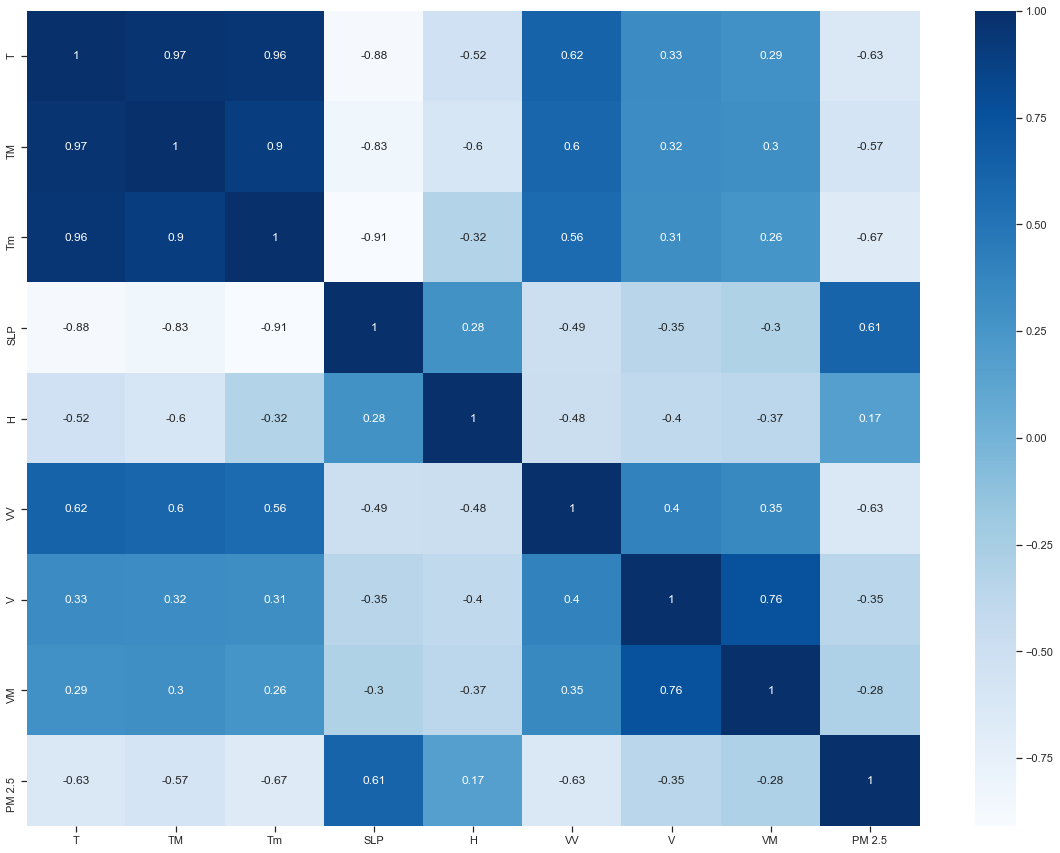

In [7]:
#lets see this on a heatmap now
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [48]:
x_train.shape

(621, 8)

In [49]:
model=Sequential()

In [50]:
model.add(Dense(128,activation='relu',kernel_initializer='normal',input_dim=x_train.shape[1]))
model.add(Dense(256,activation='relu',kernel_initializer='normal'))
model.add(Dense(256,activation='relu',kernel_initializer='normal'))
model.add(Dense(256,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,activation='linear',kernel_initializer='normal'))

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

In [53]:
history=model.fit(x_train,y_train,validation_batch_size=0.3,batch_size=10,epochs=100,verbose=1)

Epoch 1/100
63/63 [==============================] - 0s 1ms/step - loss: 67.4624 - mean_absolute_error: 67.4624
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 63.9311 - mean_absolute_error: 63.9311
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 64.3881 - mean_absolute_error: 64.3881
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 59.7378 - mean_absolute_error: 59.7378
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 56.3149 - mean_absolute_error: 56.3149
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 45.2866 - mean_absolute_error: 45.2866
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 45.3672 - mean_absolute_error: 45.3672
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 42.8083 - mean_absolute_error: 42.8083
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 42.4891 - mean_absolute_error: 

63/63 [==============================] - 0s 2ms/step - loss: 39.2881 - mean_absolute_error: 39.2881
Epoch 74/100
63/63 [==============================] - 0s 3ms/step - loss: 39.0103 - mean_absolute_error: 39.0103
Epoch 75/100
63/63 [==============================] - 0s 3ms/step - loss: 37.3694 - mean_absolute_error: 37.3694
Epoch 76/100
63/63 [==============================] - 0s 2ms/step - loss: 38.0848 - mean_absolute_error: 38.0848
Epoch 77/100
63/63 [==============================] - 0s 1ms/step - loss: 39.5804 - mean_absolute_error: 39.5804
Epoch 78/100
63/63 [==============================] - 0s 1ms/step - loss: 38.7059 - mean_absolute_error: 38.7059
Epoch 79/100
63/63 [==============================] - 0s 1ms/step - loss: 37.7423 - mean_absolute_error: 37.7423
Epoch 80/100
63/63 [==============================] - 0s 2ms/step - loss: 37.4786 - mean_absolute_error: 37.4786
Epoch 81/100
63/63 [==============================] - 0s 2ms/step - loss: 38.5478 - mean_absolute_error: 38.5

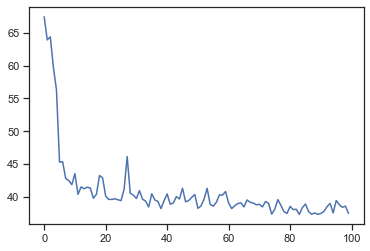

In [54]:
plt.plot(history.history['mean_absolute_error'])

KeyError: <class 'tensorflow.python.keras.layers.advanced_activations.PReLU'>

In [55]:
y_pred=model.predict(x_test)

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

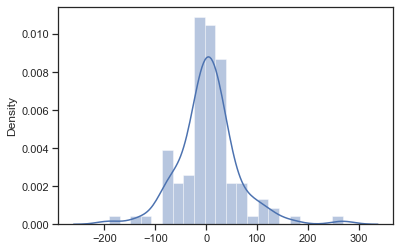

In [59]:
sns.distplot(y_test.values.reshape(-1,1)-y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
print('MAE is :{}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE is :{}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE is :{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

MAE is :39.97815638802269
MSE is :3484.74300670754
RMSE is :59.03171187342902


#### Hyperparam optimization

In [71]:
import keras_tuner
from keras_tuner import RandomSearch

In [102]:
def build_model(hp):
    model=Sequential()
    for i in range(hp.Int('Number_layers ',2,20)):
        model.add(Dense(units=hp.Int('units_ '+str(i),min_value=32,max_value=512,step=32),activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(1,activation='linear',
                        kernel_initializer='normal'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('Learning_rate ',[1e-3,1e-2,1e-4])),
                      loss='mean_absolute_error',
                      metrics='mean_absolute_error')
    return model

In [122]:
tunner=RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    directory='Project build 0.0.7',
    project_name='AQI ANN'
)

In [123]:
tunner.search_space_summary()

Search space summary
Default search space size: 4
Number_layers  (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_ 0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_ 1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
Learning_rate  (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.01, 0.0001], 'ordered': True}


In [124]:
tunner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 05s]
val_mean_absolute_error: 54.55282211303711

Best val_mean_absolute_error So Far: 54.55282211303711
Total elapsed time: 00h 00m 20s
INFO:tensorflow:Oracle triggered exit


In [121]:
tunner.results_summary()

Results summary
Results in Project build 0.0.6\AQI ANN
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
Number_layers : 5
units_ 0: 288
units_ 1: 64
Learning_rate : 0.0001
units_ 2: 128
units_ 3: 320
units_ 4: 320
units_ 5: 384
units_ 6: 128
units_ 7: 256
units_ 8: 480
units_ 9: 256
units_ 10: 64
units_ 11: 96
units_ 12: 416
units_ 13: 352
units_ 14: 416
units_ 15: 320
Score: 54.996785481770836
Trial summary
Hyperparameters:
Number_layers : 8
units_ 0: 384
units_ 1: 224
Learning_rate : 0.01
units_ 2: 32
units_ 3: 32
units_ 4: 32
units_ 5: 32
units_ 6: 32
units_ 7: 32
Score: 55.20622889200846
Trial summary
Hyperparameters:
Number_layers : 7
units_ 0: 416
units_ 1: 256
Learning_rate : 0.001
units_ 2: 64
units_ 3: 320
units_ 4: 320
units_ 5: 256
units_ 6: 160
units_ 7: 480
units_ 8: 96
units_ 9: 160
units_ 10: 256
units_ 11: 64
units_ 12: 448
units_ 13: 288
units_ 14: 480
units_ 15: 288
Score: 56.08318074544271
Trial summary


In [112]:
###Accordingly we will design an ANN
model=Sequential()
model.add(Dense(160,activation='relu',kernel_initializer='normal',input_dim=x_train.shape[1]))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,activation='linear',kernel_initializer='normal'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='mean_absolute_error',metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 160)               1440      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                5152      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 32)               

In [125]:
history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_batch_size=0.2,verbose=1)

Epoch 1/100
63/63 [==============================] - 1s 1ms/step - loss: 74.6315 - mean_absolute_error: 74.6315
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 67.2962 - mean_absolute_error: 67.2962
Epoch 3/100
63/63 [==============================] - 0s 986us/step - loss: 54.0858 - mean_absolute_error: 54.0858
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 54.9158 - mean_absolute_error: 54.9158
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 57.2951 - mean_absolute_error: 57.2951
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 55.5652 - mean_absolute_error: 55.5652
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 46.4214 - mean_absolute_error: 46.4214
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 48.2433 - mean_absolute_error: 48.2433
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 47.1864 - mean_absolute_error

63/63 [==============================] - 0s 1ms/step - loss: 43.2176 - mean_absolute_error: 43.2176
Epoch 74/100
63/63 [==============================] - 0s 1ms/step - loss: 41.8819 - mean_absolute_error: 41.8819
Epoch 75/100
63/63 [==============================] - 0s 1ms/step - loss: 43.8931 - mean_absolute_error: 43.8931
Epoch 76/100
63/63 [==============================] - 0s 1ms/step - loss: 41.3757 - mean_absolute_error: 41.3757
Epoch 77/100
63/63 [==============================] - 0s 1ms/step - loss: 43.3309 - mean_absolute_error: 43.3309
Epoch 78/100
63/63 [==============================] - 0s 1ms/step - loss: 41.2520 - mean_absolute_error: 41.2520
Epoch 79/100
63/63 [==============================] - 0s 1ms/step - loss: 44.6961 - mean_absolute_error: 44.6961
Epoch 80/100
63/63 [==============================] - 0s 1ms/step - loss: 42.8938 - mean_absolute_error: 42.8938
Epoch 81/100
63/63 [==============================] - 0s 1ms/step - loss: 41.3233 - mean_absolute_error: 41.3

##### As we can see here that the hyperparameter tunning has not given good score so we are excluding it right now